In [1]:
from PIL import Image
import os, numpy as np
import tensorflow as tf

print(os.getenv("HOME"))
#folder = 'resolution50'

resolution = 100 

layer = "Ortoilmakuva_2019_5cm"
# layer = "Vaaravariortoilmakuva_2019_20cm"

folder ="/Users/alexanderjung/PedestrianCrossingImg/"+"resolution_"+str(resolution)+"_layer_"+layer


# read in all png files in the directory "folder"

filelist=os.listdir(folder)
for fichier in filelist:
    if not(fichier.endswith(".png")):
        filelist.remove(fichier)

# read in the png images as rgb arrays and store them in im_array

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join(folder, filename)) for filename in filelist]
im_array = np.array(ims, dtype='uint8')

/Users/alexanderjung


In [2]:
print(im_array.shape)

nrsamples = im_array.shape[0]   # total number of png images
pixelsx = im_array.shape[1]     # number of pixels in x-direction
pixelsy = im_array.shape[2]     # number of pixels in y-direction
channels = im_array.shape[3]    # number of colour channels (3)

X=im_array.reshape(nrsamples,pixelsx*pixelsy*channels)

(1393, 100, 100, 3)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

matrix = im_array[10,:,:,:]; 

imgplot = plt.imshow(matrix)
plt.show()

plt.imshow(matrix[40:50,:,:])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [5]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)


(1393, 2)


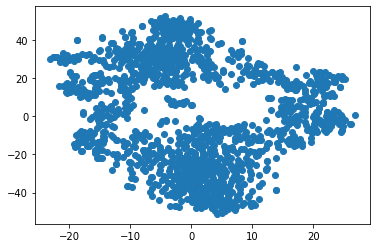

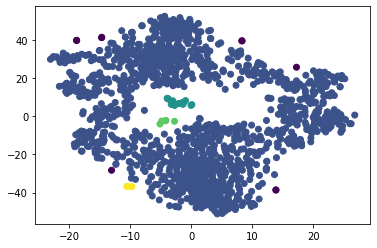


[  10. 1359.   16.    5.    3.]
1


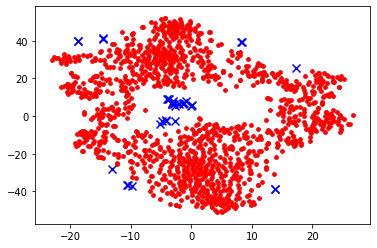

In [58]:
from sklearn.cluster import DBSCAN

print(X_embedded.shape)
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

# cluster the data points using features X_embedded obtained from t-SNE  

clustering = DBSCAN(eps=(3), min_samples=3).fit(X_embedded)
plt.scatter(X_embedded[:,0], X_embedded[:,1],c=clustering.labels_)
plt.show()

# determine the cluster sizes 

labels = clustering.labels_ 
labelvals = np.unique(labels)
print()
clustersize = np.zeros(labelvals.shape[0])
for iterval in range(labelvals.shape[0]) : 
     tmp = np.where(abs(labels-labelvals[iterval])< 0.1)
     tmp = tmp[0]
     clustersize[iterval] = tmp.shape[0]
        
print(clustersize)

# determine largest cluster 

maxlabel = np.argmax(clustersize)

print(maxlabel)

# collect data points outside largest cluster (we consider them outliers)

tmp = np.where(abs(labels-labelvals[maxlabel])> 0.1)
tmp = tmp[0]
outlier= tmp

tmp = np.where(abs(labels-labelvals[maxlabel])< 0.1)
tmp = tmp[0]
inlier= tmp

#plt.scatter(x, y, s=area1, marker='^', c=c)
#plt.scatter(x, y, s=area2, marker='o', c=c)
plt.scatter(X_embedded[outlier,0], X_embedded[outlier,1],  s=64, marker='x',c ='blue')
plt.scatter(X_embedded[inlier,0], X_embedded[inlier,1],  s=14, marker='o',c ='red')
plt.savefig('ClusteredImages.jpg',dpi=50,transparent=True)
plt.show()

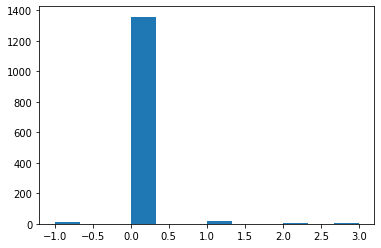

In [52]:
plt.hist(clustering.labels_, bins='auto') 
plt.show()

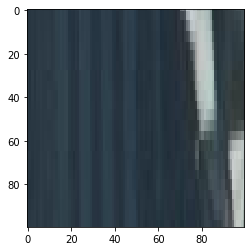

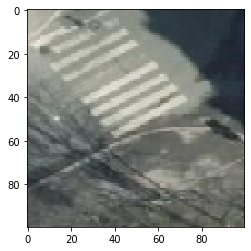

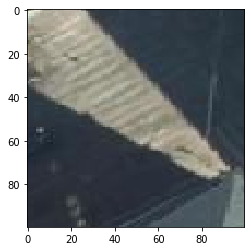

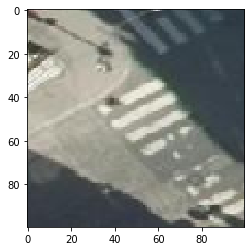

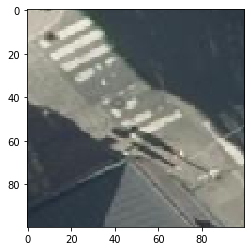

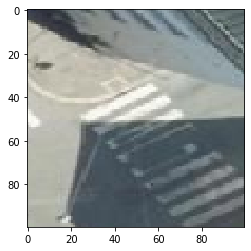

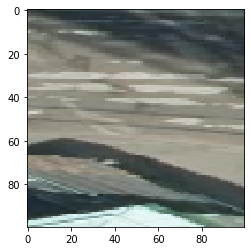

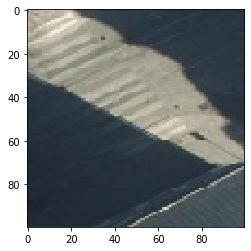

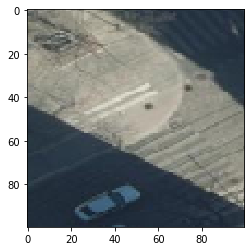

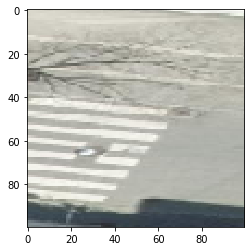

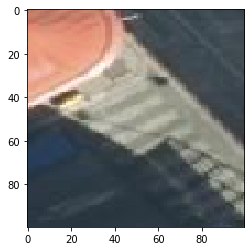

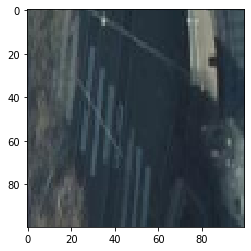

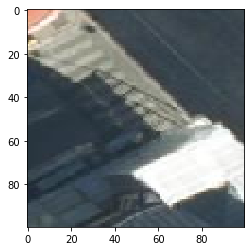

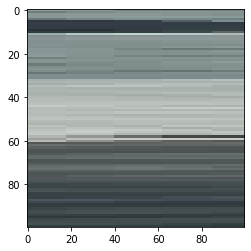

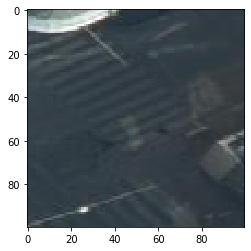

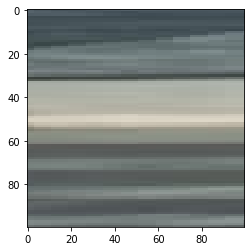

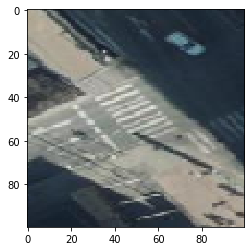

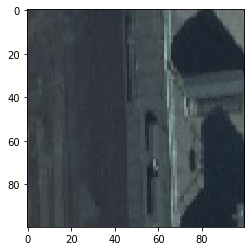

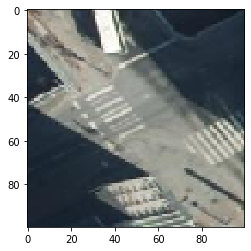

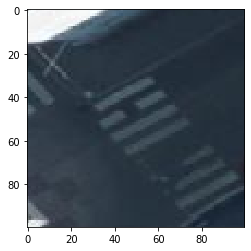

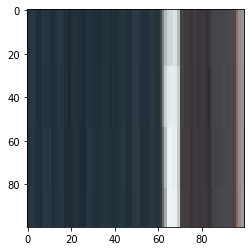

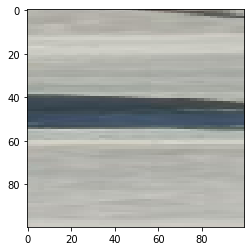

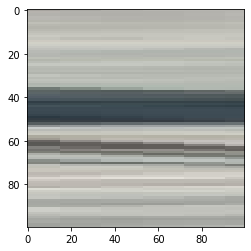

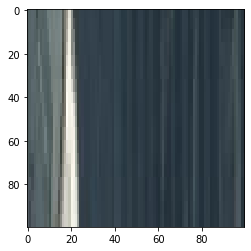

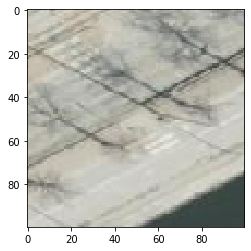

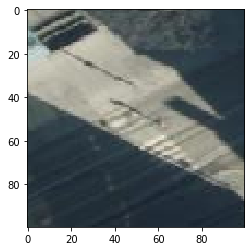

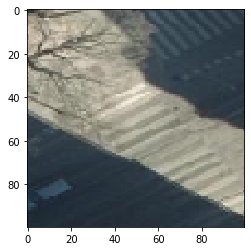

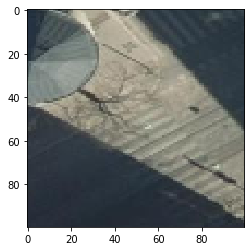

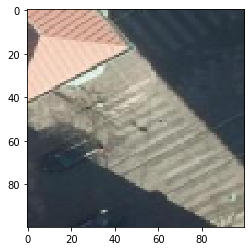

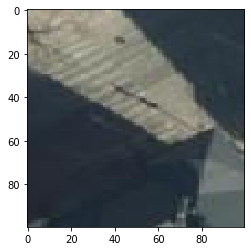

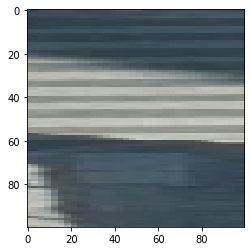

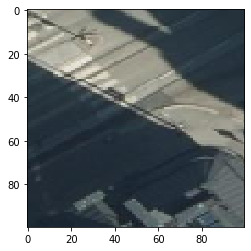

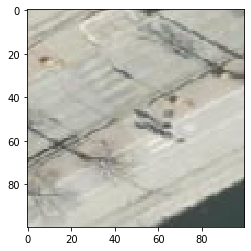

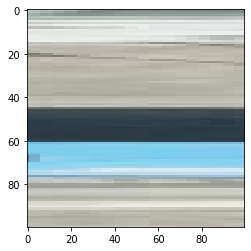

In [59]:


for imgidx in outlier :
    
    matrix = im_array[imgidx,:,:,:]; 
    imgplot = plt.imshow(matrix)
    filename = "outlier" + str(imgidx) +".jpg"
    plt.savefig(filename,dpi=50,transparent=True)
    plt.show()